In [1]:
from comsol.model import MLP
from comsol.utils import Config, Trainer
from comsol.datasets import FieldDataset
from comsol.datasets import BDDataset
import torch
import numpy as np
from config import fontsize, ticksize
import os
os.chdir("E:/code/comsol")

exps = "exports/slit-9-1/params_del_bad.csv"
config = "config/cell_local.yaml"
# ckpt = "ckpt/0_5%/earlystop_best_0.001538.pth"
ckpt = r"ckpt\2024.11.12_19.33.43\earlystop_best_0.000514.pth"


cfg = Config(config)
dataset = BDDataset(exps)
model = MLP(cfg)
model.load_state_dict(torch.load(ckpt))
trainer = Trainer(dataset, model, cfg, ckpt_path="ckpt/test", test=True)
y_trues, y_preds, r2 = trainer.test()
# rand_idx = np.random.randint(0, len(y_trues), 100)
y_trues = dataset.denorm_bd(y_trues)
y_preds = dataset.denorm_bd(y_preds)

C:\Users\10951\AppData\Local\Temp\ipykernel_28596\1389273037.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(ckpt))


[23:05:42] Test loss: 0.000532, R2 score:  0.987737                                                    ]8;id=60318;file://E:\code\comsol\src\comsol\utils.py\utils.py]8;;\:]8;id=907603;file://E:\code\comsol\src\comsol\utils.py#143\143]8;;\

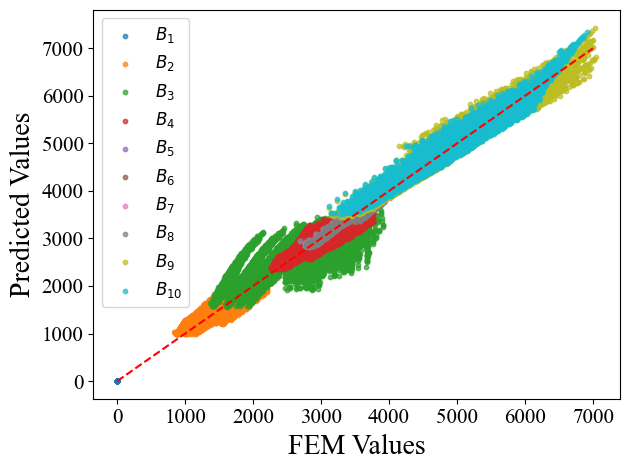

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'
# 绘制散点图
plt.figure()
plt.tick_params(axis='both', labelsize=ticksize)
plt.plot([0, 7000], [0, 7000], 'r--')
for i in range(y_trues.shape[1]):
    legend = '$B_' + '{' + str(i+1) + '}$'
    plt.scatter(y_trues[:, i], y_preds[:, i], alpha=0.7, label=legend, s=10, rasterized=True)
plt.legend()
plt.xlabel('FEM Values', fontsize=fontsize)
plt.ylabel('Predicted Values', fontsize=fontsize)
# plt.title('True vs. Predicted Values', fontsize=fontsize)
plt.tight_layout()
plt.savefig("notebooks/plots/figures/fig3a_r2.pdf")
plt.show()

In [3]:
import numpy as np

# 筛选出 y_trues[:, 2] 中小于 0.01 的索引
indices = np.where(y_trues[:, 2] < 0.01)[0]
print(indices)

[]


In [4]:
y_trues[indices, 2]

array([], dtype=float64)

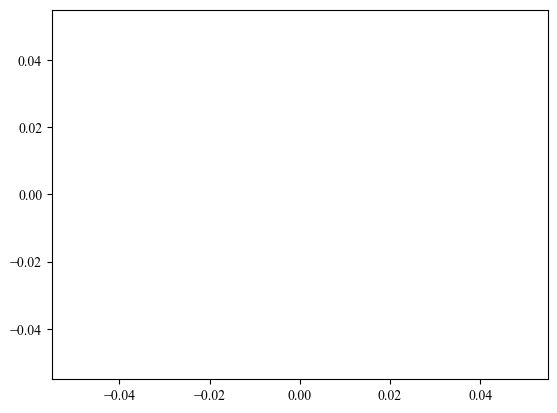

In [5]:
plt.scatter(y_trues[indices, 2], y_preds[indices, 2], alpha=0.5, label=f"bd_3", s=5)